<a href="https://colab.research.google.com/github/cstirneman1/MLA_CMS/blob/main/FinalProject_Classification_CMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 2
Chris Stirneman

#Standard Imports


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Imports for specific models


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


#Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Imports for Performance Measures


In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#Confusion Matrix Function


In [48]:
def plot_cm(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


#Problem 2


#Reading the Data


In [13]:
df = pd.read_csv('/content/gdrive/MyDrive/Machine_Learning/car-data.csv')
df.columns = [col.rstrip('\t') for col in df.columns] #removed the \t in the column names
df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#Statistical and Visual Exploration


In [14]:
df.describe()


,doors,persons
count,1728.000000,1728.000000
mean,3.500000,3.666667
std,1.118358,1.247580
min,2.000000,2.000000
25%,2.750000,2.000000
50%,3.500000,4.000000
75%,4.250000,5.000000
max,5.000000,5.000000


In [26]:
categorical_columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in categorical_columns:
    print(f"Counts for {col}:")
    print(df[col].value_counts())
    print()

Counts for buying:
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Counts for maint:
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Counts for doors:
doors
2    432
3    432
4    432
5    432
Name: count, dtype: int64

Counts for persons:
persons
2    576
4    576
5    576
Name: count, dtype: int64

Counts for lug_boot:
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

Counts for safety:
safety
low     576
med     576
high    576
Name: count, dtype: int64

Counts for class:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   int64 
 3   persons   1728 non-null   int64 
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


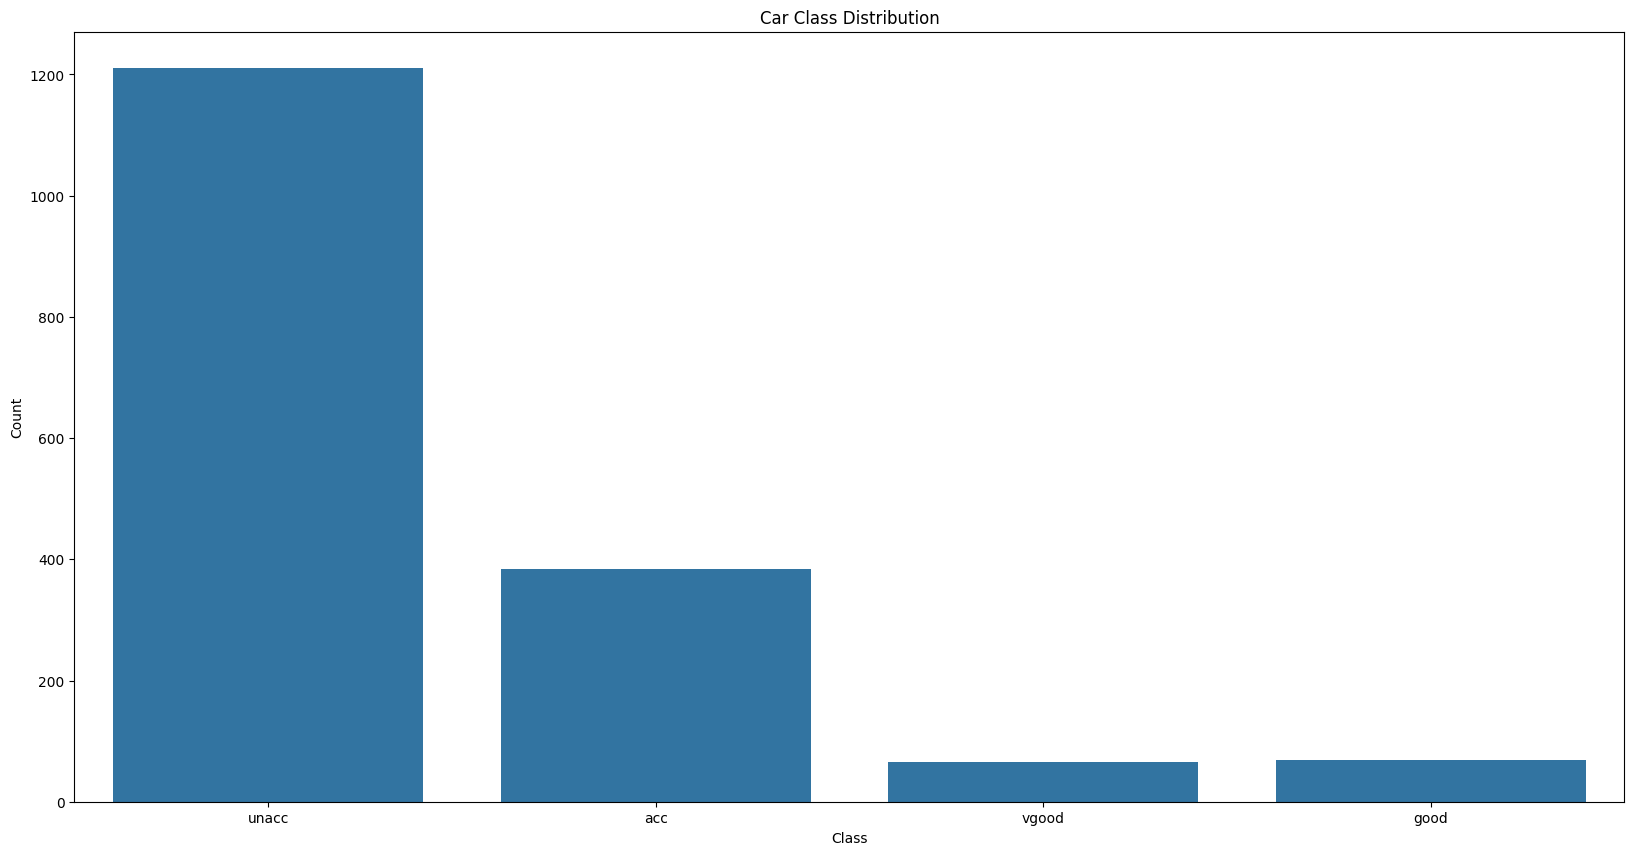

In [18]:
plt.figure(figsize=(20, 10))
sns.countplot(x='class', data=df)
plt.title('Car Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

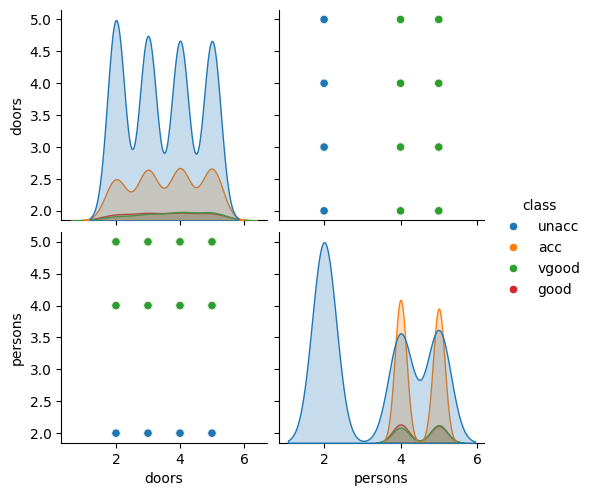

In [27]:
pairplot = sns.pairplot(df, hue='class')
plt.show()


#Splitting Data into Train/Test


In [28]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Building the Pipeline


In [29]:
categorical_features = ['buying', 'maint', 'lug_boot', 'safety']
numerical_features = ['doors', 'persons']

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features),
    ])

In [31]:
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [32]:
param_grid = {
    'classifier__C': [0.1, 1.0, 10, 100],
    'classifier__solver': ['liblinear', 'lbfgs']
}

In [33]:
grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, scoring='accuracy')


In [34]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

#Executing the Model


In [36]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['doors',
                                                                          'persons']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['buying',
                                                                          'maint',
                                                                          'lug_boot',
                                                                          'safety'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [0.1, 1.0, 10, 100],
                         'classifier__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [38]:
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['doors', 'persons']),
                                                 ('cat', OneHotEncoder(),
                                                  ['buying', 'maint',
                                                   'lug_boot', 'safety'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

#Evaluating Model

In [44]:
logreg_predictions = logreg_pipeline.predict(X_test)
rf_predictions = rf_pipeline.predict(X_test)

logreg_accuracy = accuracy_score(y_test, logreg_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Logistic Regression Test Accuracy: {logreg_accuracy:.2f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:.2f}")

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Logistic Regression Test Accuracy: 0.87
Random Forest Test Accuracy: 0.96
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         acc       0.76      0.70      0.73        83
        good       0.50      0.36      0.42        11
       unacc       0.91      0.96      0.94       235
       vgood       0.93      0.82      0.87        17

    accuracy                           0.87       346
   macro avg       0.78      0.71      0.74       346
weighted avg       0.87      0.87      0.87       346

Random Forest Classification Report:
              precision    recall  f1-score   support

         acc       0.97      0.88      0.92        83
        good       0.59      0.91      0.71        11
       unacc       0.98      1.00      0.99       235
       vgood       0.88      0.82      0.85        17

    accuracy                           0.96       346
   macro avg       0.85      0.90      0.87       346
weighted avg       0.96      0.

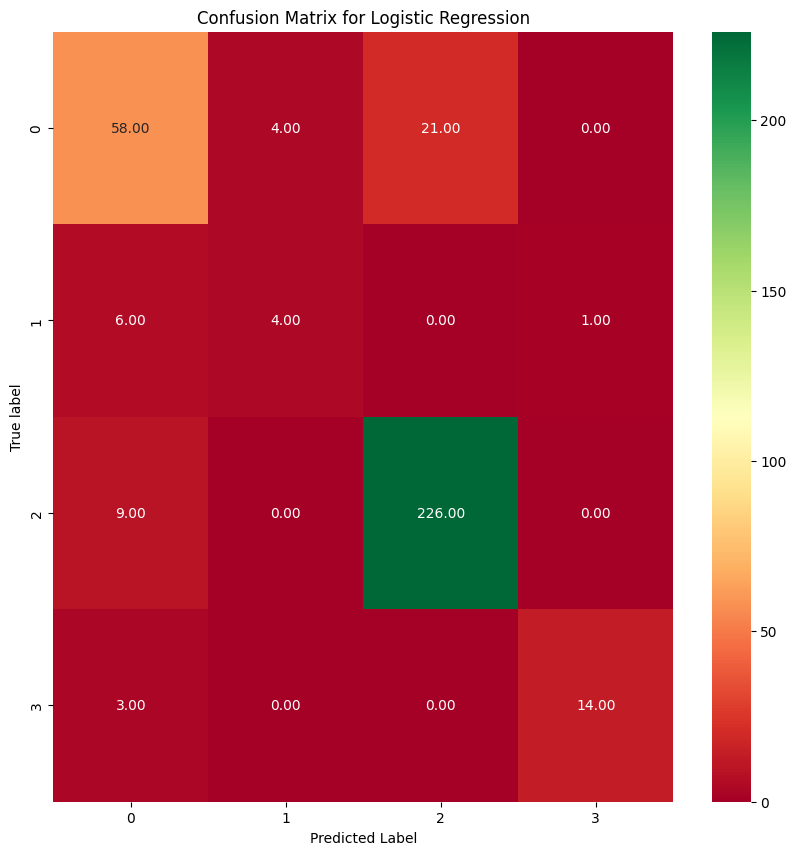

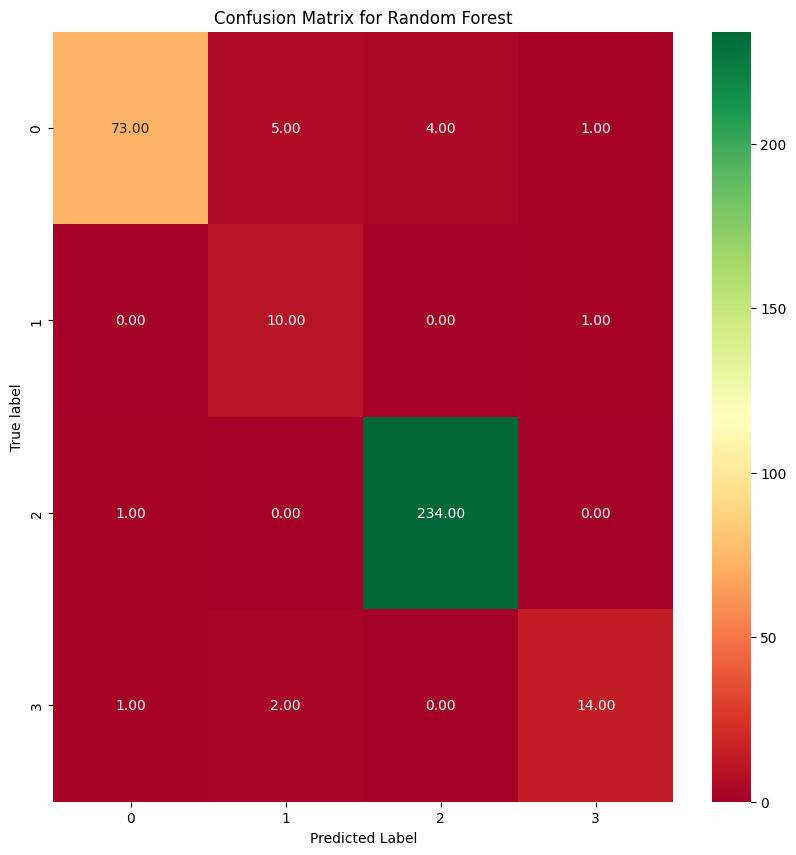

In [49]:
plot_cm(y_test, logreg_predictions, "Logistic Regression")

plot_cm(y_test, rf_predictions, "Random Forest")

#conclusion

Accuracy: The Random Forest model demonstrates significantly higher overall accuracy (0.96) compared to the Logistic Regression model (0.87). This metric indicates that, on average, the Random Forest model is more reliable for predictions across all classes.

Precision: The Random Forest model also has higher precision across most classes. Notably, it performs exceptionally well for the 'acc' and 'unacc' classes, with precision scores of 0.97 and 0.98, respectively, indicating a high rate of true positive predictions. The Logistic Regression model has lower precision, especially for the 'good' class (0.50).

Recall: In terms of recall, the Random Forest model exhibits superior ability to identify all positive instances, particularly with the 'good' class, achieving a recall of 0.91, which is a substantial improvement over the Logistic Regression model's recall of 0.36 for the same class. The recall scores for 'unacc' and 'vgood' classes are also better in the Random Forest model, indicating fewer false negatives.

F1 Score: Reflecting the balance between precision and recall, the F1 scores are generally higher for the Random Forest model, with marked improvements for 'acc', 'good', and 'vgood' classes. The 'unacc' class has a high F1 score in both models, but it is perfect (0.99) in the Random Forest model.

The confusion matrices reinforce the above findings. The Random Forest model shows a clear advantage in distinguishing between classes, with more true positives and fewer false positives and false negatives, as indicated by the larger values on the diagonal for all classes, particularly for the 'unacc' class which is the most prevalent in the dataset.
The Logistic Regression model shows some struggle with the 'good' class, incorrectly predicting this class as 'acc' or 'unacc' in several instances.

Overall the Random Forest model outshines the Logistic Regression model in every metric on this dataset. Its high precision and recall across the board indicate a robust predictive capability, especially in distinguishing the 'unacc' class, which is crucial for the dataset. Additionally, its ability to correctly identify the 'good' class instances demonstrates the model's sensitivity to less frequent categories.